#Importing Dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")

print("Path to dataset files:", path)

c:\Users\jingf\anaconda3\envs\tf-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\jingf\.cache\kagglehub\datasets\kritikseth\fruit-and-vegetable-image-recognition\versions\8


#Importing libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

##Training Image preprocessing

In [ ]:
# use the downloaded dataset path stored in the variable `path`
training_set = tf.keras.utils.image_dataset_from_directory(
    path,
    labels="inferred", #Infers labels from directory structure
    label_mode="categorical", #One-hot encodes labels for multi-class (36 classes) classification
    class_names=None, #Automatically infers class names from directory structure
    color_mode="rgb", #Loads images in RGB format
    batch_size=32, #Processes 32 images at a time (memory efficiency)
    image_size=(64, 64), #Resizes all images to 64x64 pixels for uniformity
    shuffle=True, #Randomizes data order to prevent learning patterns from sequence
    seed=None, #No specific seed for randomness
    validation_split=None, #No validation split
    subset=None, #No subset specified
    interpolation="bilinear", #Uses bilinear interpolation for resizing images
    follow_links=False, #Does not follow symbolic links in the directory
    crop_to_aspect_ratio=False #Does not crop images to maintain original aspect ratio
)

Found 3825 files belonging to 3 classes.


##Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3825 files belonging to 3 classes.


#Building Model

In [6]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

1. Initial Feature Extraction

In [ ]:
# Detects 32 different basic features (edges, colors, textures) from the input images
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
# Adds non-linearity, helps learn complex patterns
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
# Reduces image size by 50%, keeps important features
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
# Randomly "turns off" 25% of neurons to prevent overfitting
cnn.add(tf.keras.layers.Dropout(0.25))

2. Deeper Feature Extraction

In [ ]:
# Detects more complex patterns (combinations of basic features)
# Maintains consistency in architecture
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# Complex patterns like fruit textures, vegetable shapes, color combinations

3. Dense Layers (Decision Making)

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25)) 

In [ ]:
# Converts 2D feature maps to 1D vector
cnn.add(tf.keras.layers.Flatten())

In [ ]:
# 512 neurons combine features to make decisions
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [ ]:
# Further refinement of decision-making
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [ ]:
# Stronger dropout before final decision (prevents overfitting)
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [ ]:
# Final layer outputs probability for each of 36 classes
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Smart learning algorithm (adjusts learning rate automatically)
# Loss function for multi-class classification
# Tracks how many predictions are correct

In [17]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                        

In [18]:
#Output Layer# ensure the number of output units matches the dataset label dimension
num_classes = training_set.element_spec[1].shape[-1]
cnn.add(tf.keras.layers.Dense(units=int(num_classes), activation='softmax'))

##Evaluating Model

In [19]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

120/120 [==============================] - 23s 172ms/step - loss: 1.1092 - accuracy: 0.1129
Training accuracy: 0.11294117569923401


In [20]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

120/120 [==============================] - 21s 161ms/step - loss: 1.1092 - accuracy: 0.1129
Validation accuracy: 0.11294117569923401


##Saving Model

In [21]:
cnn.save('trained_model.h5')

In [22]:
# Ensure the model is compiled with the final output layer included (recompile if layers were added after previous compile)
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save the History object to training_history so subsequent cells can use it
training_history = cnn.fit(
	training_set,
	validation_data=validation_set,
	epochs=32
)

# Return dictionary of history
training_history.history

Epoch 1/32
120/120 [==============================] - 55s 439ms/step - loss: 0.9154 - accuracy: 0.6620 - val_loss: 0.7952 - val_accuracy: 0.8144
Epoch 2/32
120/120 [==============================] - 54s 442ms/step - loss: 0.7549 - accuracy: 0.8139 - val_loss: 0.7025 - val_accuracy: 0.8144
Epoch 3/32
120/120 [==============================] - 55s 444ms/step - loss: 0.7067 - accuracy: 0.8144 - val_loss: 0.6642 - val_accuracy: 0.8144
Epoch 4/32
120/120 [==============================] - 56s 452ms/step - loss: 0.6428 - accuracy: 0.8144 - val_loss: 0.6278 - val_accuracy: 0.8144
Epoch 5/32
120/120 [==============================] - 55s 450ms/step - loss: 0.6226 - accuracy: 0.8144 - val_loss: 0.6157 - val_accuracy: 0.8144
Epoch 6/32
120/120 [==============================] - 55s 450ms/step - loss: 0.6140 - accuracy: 0.8144 - val_loss: 0.6111 - val_accuracy: 0.8144
Epoch 7/32
120/120 [==============================] - 56s 452ms/step - loss: 0.6132 - accuracy: 0.8144 - val_loss: 0.6095 - val_ac

{'loss': [0.9153704643249512,
  0.754948079586029,
  0.7067054510116577,
  0.6427958011627197,
  0.6225555539131165,
  0.6140338182449341,
  0.6131688356399536,
  0.6106958389282227,
  0.6094139814376831,
  0.6101446747779846,
  0.6103186011314392,
  0.6100247502326965,
  0.6100805997848511,
  0.6089751124382019,
  0.6092016100883484,
  0.6086778044700623,
  0.6089022159576416,
  0.6085431575775146,
  0.6084958910942078,
  0.6086063385009766,
  0.6089134216308594,
  0.6088467240333557,
  0.6085989475250244,
  0.6086506843566895,
  0.6086411476135254,
  0.6087536215782166,
  0.6085886359214783,
  0.6086058020591736,
  0.6083833575248718,
  0.6085554957389832,
  0.6086583137512207,
  0.6085897088050842],
 'accuracy': [0.661960780620575,
  0.8138561844825745,
  0.814379096031189,
  0.814379096031189,
  0.814379096031189,
  0.814379096031189,
  0.814379096031189,
  0.814379096031189,
  0.814379096031189,
  0.814379096031189,
  0.814379096031189,
  0.814379096031189,
  0.814379096031189,
  

In [23]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [24]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy of Model Achieved on Validation set

In [25]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 81.4379096031189 %


#Accuracy Visualization

##Training Visualization

In [ ]:
#training_history.history['accuracy']

[0.661960780620575,
 0.8138561844825745,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189,
 0.814379096031189]

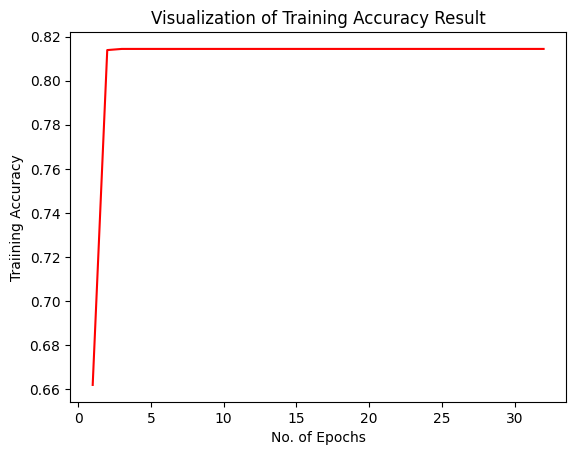

In [27]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

##Validation Accuracy

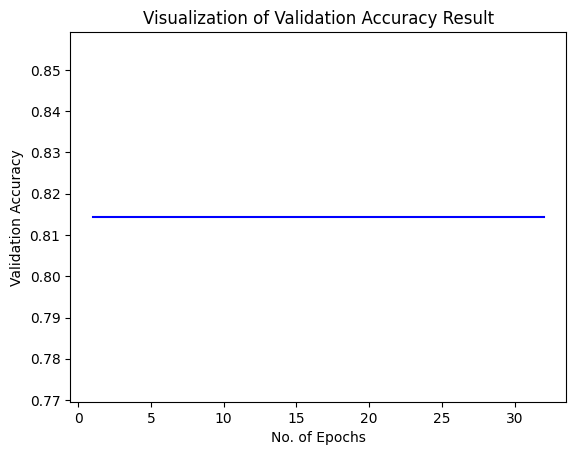

In [28]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

##Test set Evaluation

In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3825 files belonging to 3 classes.


In [31]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

120/120 [==============================] - 21s 167ms/step - loss: 0.6085 - accuracy: 0.8144
Test accuracy: 0.814379096031189
